# MKTG 880 Homework 3: Blackberry Pearl Positioning

Eric VanMeerhaeghe



3/6/2019

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('seaborn-poster')

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## Reading in the data

In [2]:
df = pd.read_excel('BlackBerryPositioningData.xlsx', index_col=0)
df

,Push email availability,Email folders synchronization,Instant messaging availability,Speed in accessing email,Software selection,Display size,Ease of use for navigation,Ease of use for typing,Voice/call quality,Comfortable to call,User friendliness,Media quality,Camera quality,Compact,Quality of display,Finish,Product image,Brand image,High prestige,Value for money,Average user rating (CNET),CNET Editor’s rating,Segment I,Segment II,Segment III
Brands,,,,,,,,,,,,,,,,,,,,,,,,,
BlackBerry Pearl,8.2,8.0,7.2,6.4,7.0,6.5,5.5,5.7,5.6,7.4,6.6,6.1,5.7,6.9,7.5,7.4,5.9,8.6,7.2,6.0,8.0,7.3,8.428571,5.545455,5.60
Palm Treo 700p,7.4,7.1,5.1,6.5,6.8,6.5,6.5,6.2,8.0,6.9,7.2,7.0,6.2,5.7,6.3,5.5,5.4,8.5,6.9,5.4,7.5,7.7,7.023810,4.454545,4.32
Motorola Q,6.4,6.3,5.3,8.0,6.5,7.4,6.1,7.4,4.8,6.1,7.3,6.9,6.6,6.7,7.3,7.4,4.9,7.2,6.8,4.2,6.2,8.0,7.857143,3.121212,4.68
Nokia 9300,6.4,6.4,6.7,6.3,6.3,6.4,4.2,4.5,7.8,4.2,4.1,5.9,0.5,4.5,5.1,6.1,5.0,6.5,5.5,4.6,7.3,6.3,6.190476,7.181818,4.36
Sidekick 3,4.5,1.2,7.2,6.2,3.0,7.2,3.6,6.8,6.3,3.1,4.0,6.4,4.2,3.6,3.8,5.2,4.0,3.0,1.2,5.3,6.3,7.3,2.928571,3.424242,7.04
Sony Ericsson M600i,6.0,6.2,1.5,8.1,6.5,7.3,6.1,5.0,8.0,5.2,6.0,7.8,1.3,5.1,6.2,5.1,4.1,4.5,4.0,4.0,6.4,7.7,5.380952,3.606061,4.36


## Scaling the data

In [3]:
X = ((df-df.mean())/(df.std()))
X

,Push email availability,Email folders synchronization,Instant messaging availability,Speed in accessing email,Software selection,Display size,Ease of use for navigation,Ease of use for typing,Voice/call quality,Comfortable to call,User friendliness,Media quality,Camera quality,Compact,Quality of display,Finish,Product image,Brand image,High prestige,Value for money,Average user rating (CNET),CNET Editor’s rating,Segment I,Segment II,Segment III
Brands,,,,,,,,,,,,,,,,,,,,,,,,,
BlackBerry Pearl,1.359838,0.894602,0.785490,-0.584386,0.656188,-0.829293,0.142358,-0.213836,-0.831893,1.167817,0.494563,-0.837043,0.619705,1.160532,1.052282,1.218269,1.381378,0.989971,0.832694,1.396639,1.399378,-0.140127,1.071489,0.635646,0.497786
Palm Treo 700p,0.726127,0.517192,-0.184821,-0.471279,0.522726,-0.829293,0.996508,0.244384,0.904232,0.863169,0.899206,0.454395,0.811367,0.221675,0.191324,-0.585402,0.702012,0.945311,0.703483,0.623116,0.733008,0.532482,0.363827,-0.064862,-0.682151
Motorola Q,-0.066012,0.181716,-0.092411,1.225325,0.322533,1.117743,0.654848,1.344115,-1.410601,0.375732,0.966646,0.310902,0.964696,1.004056,0.908789,1.218269,0.022646,0.364726,0.660413,-0.923930,-0.999556,1.036939,0.783626,-0.921038,-0.350294
Nokia 9300,-0.066012,0.223650,0.554463,-0.697493,0.189071,-1.045631,-0.968037,-1.313567,0.759555,-0.781929,-1.191448,-1.124029,-1.373573,-0.717183,-0.669634,-0.015822,0.158519,0.052104,0.100498,-0.408248,0.466459,-1.821650,-0.055973,1.686407,-0.645278
Sidekick 3,-1.571075,-1.956942,0.785490,-0.810600,-2.013051,0.685068,-1.480526,0.794250,-0.325523,-1.452155,-1.258888,-0.406564,0.044721,-1.421325,-1.602339,-0.870192,-1.200214,-1.511009,-1.751529,0.494195,-0.866282,-0.140127,-1.699190,-0.726452,1.825214
Sony Ericsson M600i,-0.382867,0.139782,-1.848211,1.338432,0.322533,0.901406,0.654848,-0.855346,0.904232,-0.172634,0.089921,1.602339,-1.066915,-0.247754,0.119578,-0.965122,-1.064340,-0.841104,-0.545558,-1.181771,-0.733008,0.532482,-0.463779,-0.609701,-0.645278


## Performing Principal Component Analysis

In [4]:
## perform PCA

n = len(X.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
## project data into 2 Dimensional PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0]  
yvector = pca.components_[1]

xs = pca.transform(X)[:,0] 
ys = pca.transform(X)[:,1]

## Making our Perceptual Map with our PCA Vectors

- Note: There isnt a Python equivalent of R's "Biplot" function, so I had to recreate it by hand, thus scale values for arrows and text are a bit inelegant as of now, and so the resulting layout of the text and arrows isnt perfect but its close to what R gives us.

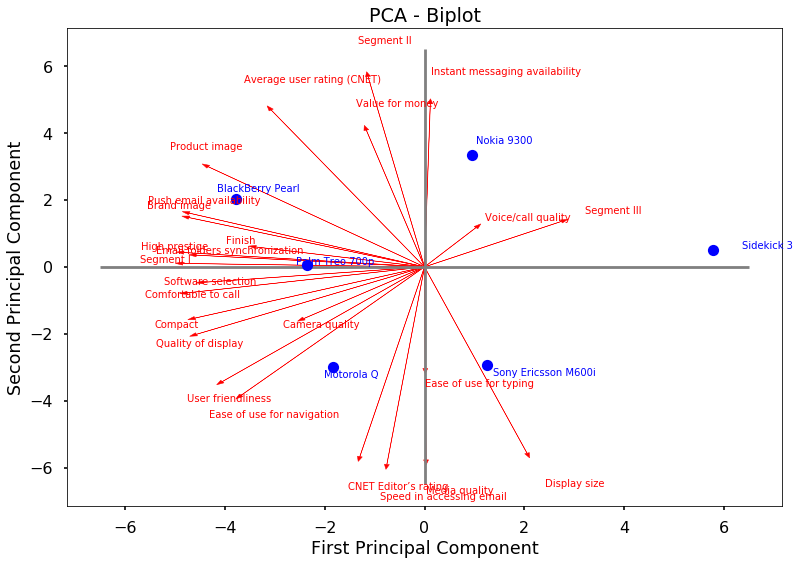

In [6]:
## visualize projections
plt.style.use('seaborn-poster') #Setting the aesthetics of the graph

#Setting Horizontal and Vertical lines to make the graph a little cleaner and clearer
plt.hlines(0,-6.5,6.5, linestyles='solid', colors='grey')
plt.vlines(0,-6.5,6.5, linestyles='solid', colors='grey')

#Giving our Plot a title and labeling the axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Biplot')


#Creating the Perceptual Map

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*17, yvector[i]*17,      
              color='r', width=.005, head_width=.1)
    plt.text(xvector[i]*20, yvector[i]*20,
             list(X.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project dimensions (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.1, ys[i]*1.1, list(X.index)[i], color='b') #Slight offset of text so it doesnt overlap point on graph

plt.show()

# Questions:

## Question 1: Describe the two (or, if applicable, three) dimensions underlying the perceptual maps that you generated. According to these maps, how do people perceive the Blackberry Pearl in the three segments? 

- I would say that PC1 likely describes phone features and aesthetics, and that PC2 describes the value or the quality that consumers get, percived or actual, from the phone they have.






- Based on these dimensions, it is clear that consumers in segment 1 clearly view the Blackberry Pearl very positively. The segment 1 vector extends in a similar direction as most of the other vectors related to brand perception, status, and desirability of the product, and the Blackberry Pearl value is in 1st place on most of those dimensions compared to the other phones.





- Segment 2 also has a decent perception of the Blackberry Pearl as well, as the Pearl actually scores higher in that segment than any other competing phone as well. This is a very positive sign because the Pearl leads all competitors along the segment 1 and segment 2 dimensions, which means it is very well positioned in the minds of consumers.







- The Pearl is not well percieved in the 3rd segment, but that segment is likely not who Blackberry was targeting with the Pearl.

## Question 2: Does Blackberry Pearl appeal to segment(s) other than business executives, as the company hoped for? Why or why not?

- The Pearl does indeed appeal to other segments than just business executives. Segment 2 also perceives the Pearl very positively, and in fact, the Pearl scores the highest in the segment 1 and segment 2 vectors compared to all other competitors, so Blackberry did a fantastic job positioning the Pearl.




- The Pearl does not appeal to segment 3, it comes in last, but thats probably ok because Blackberry likely was not targeting that market segment.

## Question 3: Is the Pearl well-positioned to be successful? If not, to which segment(s) would you target and how would you re-position it?

- Again, I think the Pearl is positioned extremely well to be successful. It scores the highest among two out of the 3 segments measured, and it scores higher than all other phones on a majority of dimensions, including factors related to both aesthetics of the device as well as performance. The Pearl is well liked by consumers and it is a quality product with wide appeal. I would not do anything to reposition the Pearl, other than to try and reinforce the already existing perception that exists with consumers. 






- I think it would be a mistake to try to reposition to try to capture Segment 3, because based on the Perceptual Map, the Pearl ranks last among all competitors. I think segment 3 is a market segment that the Pearl wasn't meant to appeal to because those consumers are looking for something other than what the Pearl provides, and the Pearl is already well positioned to succeed in the two other segments measured in this data.